<a href="https://colab.research.google.com/github/Mileej/Proyecto_predicciones_incidentesM/blob/main/Proyecto_MovilidadMedell%C3%ADn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  FUENTE DE LOS DATOS

**Incidentes de movilidad Medellín**
tomado de: https://geomedellin-m-medellin.opendata.arcgis.com/datasets/M-Medellin::incidentes-georreferenciados-2022-gdb/explore?location=6.247704%2C-75.588628%2C12.68

Descripción: Los datos presentan información de accidentes de tránsito registrados por la Secretaría de movilidad de la Alcaldía de Medellín, en el año 2022


In [ ]:
#libreria inicial
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Semestre 2022-2/CODING_DOJO_DS/Advanced_ML/Proyecto 2/movilidad_incidentes_2022_gdb.csv')
df.head()

,X,Y,OBJECTID,RADICADO,HORA,DIA_NOMBRE,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,...,COMUNA,DISENO,MES,DIA,FECHA,MES_NOMBRE,X_MAGNAMED,Y_MAGNAMED,LONGITUD,LATITUD
0,-75.592351,6.243512,1,1783170,08:05:00,MIÉRCOLES,2022,Choque,Circular 2 Con Carrera 74,CQ 002 074 000 00000,...,Laureles Estadio,Interseccion,3,16,2022/03/16 00:00:00+00,MARZO,832338.65,1182399.08,-75.592351,6.243512
1,-75.579832,6.230514,2,1783476,17:30:00,MIÉRCOLES,2022,Choque,Carrera 55 Con Calle 29 C,CR 055 029 C 000 00000,...,Guayabal,Interseccion,3,16,2022/03/16 00:00:00+00,MARZO,833724.32,1180961.28,-75.579832,6.230514
2,-75.599001,6.269136,3,1789709,17:00:00,MIÉRCOLES,2022,Choque,Calle 54 Con Carrera 83,CL 054 083 000 00000,...,San Javier,Interseccion,5,4,2022/05/04 00:00:00+00,MAYO,831602.70,1185233.45,-75.599001,6.269136
3,-75.573979,6.232882,4,1793934,13:30:00,DOMINGO,2022,Choque,Carrera 49 Con Calle 31,CR 049 031 000 00000,...,La Candelaria,Tramo de via,6,12,2022/06/12 00:00:00+00,JUNIO,834372.23,1181223.19,-75.573979,6.232882
4,-75.703816,6.221806,5,1791043,06:45:00,MIÉRCOLES,2022,Otro,Carrera 30 Con Calle 8 A,0,...,NaN,Lote o Predio,5,18,2022/05/18 00:00:00+00,MAYO,820000.00,1180000.00,-75.703816,6.221806


Objetivo: Predecir la graverdad de los accidentes ocurridos en este año y como se relaciona con las variables como tipo de accidente, ubicación el accidente, el dia, el barrio y las otras variables pertinentes

**Tipo de modelo**: **Clasificación multivariable**

# Exploración inicial 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23577 entries, 0 to 23576
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              23577 non-null  float64
 1   Y              23577 non-null  float64
 2   OBJECTID       23577 non-null  int64  
 3   RADICADO       23577 non-null  int64  
 4   HORA           23577 non-null  object 
 5   DIA_NOMBRE     23577 non-null  object 
 6   PERIODO        23577 non-null  int64  
 7   CLASE          23577 non-null  object 
 8   DIRECCION      23577 non-null  object 
 9   DIRECCION_ENC  23577 non-null  object 
 10  CBML           23577 non-null  object 
 11  TIPO_GEOCOD    23577 non-null  object 
 12  EXPEDIENTE     23577 non-null  object 
 13  GRAVEDAD       23577 non-null  object 
 14  BARRIO         21794 non-null  object 
 15  COMUNA         21794 non-null  object 
 16  DISENO         23577 non-null  object 
 17  MES            23577 non-null  int64  
 18  DIA   

In [ ]:
#cantidad de filas y columnas 
df.shape

(23577, 25)

In [ ]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'HORA', 'DIA_NOMBRE', 'PERIODO',
       'CLASE', 'DIRECCION', 'DIRECCION_ENC', 'CBML', 'TIPO_GEOCOD',
       'EXPEDIENTE', 'GRAVEDAD', 'BARRIO', 'COMUNA', 'DISENO', 'MES', 'DIA',
       'FECHA', 'MES_NOMBRE', 'X_MAGNAMED', 'Y_MAGNAMED', 'LONGITUD',
       'LATITUD'],
      dtype='object')

In [ ]:
#Eliminar columnas que no consideraremos en el ánalisis por que o están repetidas o hay otra que las abarga 
df=df.drop(columns=['X','Y','OBJECTID','RADICADO','X_MAGNAMED','Y_MAGNAMED','DIRECCION','DIRECCION_ENC','EXPEDIENTE','PERIODO','MES_NOMBRE', 'CBML'])

In [ ]:
df.head()

,HORA,DIA_NOMBRE,CLASE,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,MES,DIA,FECHA,LONGITUD,LATITUD
0,08:05:00,MIÉRCOLES,Choque,Malla vial,HERIDO,Bolivariana,Laureles Estadio,Interseccion,3,16,2022/03/16 00:00:00+00,-75.592351,6.243512
1,17:30:00,MIÉRCOLES,Choque,Malla vial,MUERTO,Tenche,Guayabal,Interseccion,3,16,2022/03/16 00:00:00+00,-75.579832,6.230514
2,17:00:00,MIÉRCOLES,Choque,Malla vial,SOLO DAÑOS,El Pesebre,San Javier,Interseccion,5,4,2022/05/04 00:00:00+00,-75.599001,6.269136
3,13:30:00,DOMINGO,Choque,Malla vial aproximada: CR 48-31,HERIDO,Perpetuo Socorro,La Candelaria,Tramo de via,6,12,2022/06/12 00:00:00+00,-75.573979,6.232882
4,06:45:00,MIÉRCOLES,Otro,No Ubicada,HERIDO,NaN,NaN,Lote o Predio,5,18,2022/05/18 00:00:00+00,-75.703816,6.221806


⏰ Cambiar a formato de fecha

In [ ]:
#Cambiar a formato de fechas y extraer cada una 
df['FECHA']=pd.to_datetime(df['FECHA'])
df['FECHA']=df['FECHA'].dt.strftime('%Y-%m-%d')
df['FECHA']=pd.to_datetime(df['FECHA'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23577 entries, 0 to 23576
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   HORA         23577 non-null  object        
 1   DIA_NOMBRE   23577 non-null  object        
 2   CLASE        23577 non-null  object        
 3   TIPO_GEOCOD  23577 non-null  object        
 4   GRAVEDAD     23577 non-null  object        
 5   BARRIO       21794 non-null  object        
 6   COMUNA       21794 non-null  object        
 7   DISENO       23577 non-null  object        
 8   MES          23577 non-null  int64         
 9   DIA          23577 non-null  int64         
 10  FECHA        23577 non-null  datetime64[ns]
 11  LONGITUD     23577 non-null  float64       
 12  LATITUD      23577 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 2.3+ MB


In [ ]:
df.head()

,HORA,DIA_NOMBRE,CLASE,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,MES,DIA,FECHA,LONGITUD,LATITUD
0,08:05:00,MIÉRCOLES,Choque,Malla vial,HERIDO,Bolivariana,Laureles Estadio,Interseccion,3,16,2022-03-16,-75.592351,6.243512
1,17:30:00,MIÉRCOLES,Choque,Malla vial,MUERTO,Tenche,Guayabal,Interseccion,3,16,2022-03-16,-75.579832,6.230514
2,17:00:00,MIÉRCOLES,Choque,Malla vial,SOLO DAÑOS,El Pesebre,San Javier,Interseccion,5,4,2022-05-04,-75.599001,6.269136
3,13:30:00,DOMINGO,Choque,Malla vial aproximada: CR 48-31,HERIDO,Perpetuo Socorro,La Candelaria,Tramo de via,6,12,2022-06-12,-75.573979,6.232882
4,06:45:00,MIÉRCOLES,Otro,No Ubicada,HERIDO,NaN,NaN,Lote o Predio,5,18,2022-05-18,-75.703816,6.221806


In [ ]:
df.shape #Nueva data con la que trabajaremos : 13 columnas

(23577, 13)

In [ ]:
#extraer columna con los dias 
df['Dia_Nomb']=df['FECHA'].dt.day_name()
df.head()

,HORA,DIA_NOMBRE,CLASE,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,MES,DIA,FECHA,LONGITUD,LATITUD,Dia_Nomb
0,08:05:00,MIÉRCOLES,Choque,Malla vial,HERIDO,Bolivariana,Laureles Estadio,Interseccion,3,16,2022-03-16,-75.592351,6.243512,Wednesday
1,17:30:00,MIÉRCOLES,Choque,Malla vial,MUERTO,Tenche,Guayabal,Interseccion,3,16,2022-03-16,-75.579832,6.230514,Wednesday
2,17:00:00,MIÉRCOLES,Choque,Malla vial,SOLO DAÑOS,El Pesebre,San Javier,Interseccion,5,4,2022-05-04,-75.599001,6.269136,Wednesday
3,13:30:00,DOMINGO,Choque,Malla vial aproximada: CR 48-31,HERIDO,Perpetuo Socorro,La Candelaria,Tramo de via,6,12,2022-06-12,-75.573979,6.232882,Sunday
4,06:45:00,MIÉRCOLES,Otro,No Ubicada,HERIDO,NaN,NaN,Lote o Predio,5,18,2022-05-18,-75.703816,6.221806,Wednesday


❤ Revisión de duplicados 

In [ ]:
df.duplicated().sum() #Total 19 

19

In [ ]:
df=df.drop_duplicates() #Eliminar duplicados
df.head()

,HORA,DIA_NOMBRE,CLASE,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,MES,DIA,FECHA,LONGITUD,LATITUD,Dia_Nomb
0,08:05:00,MIÉRCOLES,Choque,Malla vial,HERIDO,Bolivariana,Laureles Estadio,Interseccion,3,16,2022-03-16,-75.592351,6.243512,Wednesday
1,17:30:00,MIÉRCOLES,Choque,Malla vial,MUERTO,Tenche,Guayabal,Interseccion,3,16,2022-03-16,-75.579832,6.230514,Wednesday
2,17:00:00,MIÉRCOLES,Choque,Malla vial,SOLO DAÑOS,El Pesebre,San Javier,Interseccion,5,4,2022-05-04,-75.599001,6.269136,Wednesday
3,13:30:00,DOMINGO,Choque,Malla vial aproximada: CR 48-31,HERIDO,Perpetuo Socorro,La Candelaria,Tramo de via,6,12,2022-06-12,-75.573979,6.232882,Sunday
4,06:45:00,MIÉRCOLES,Otro,No Ubicada,HERIDO,NaN,NaN,Lote o Predio,5,18,2022-05-18,-75.703816,6.221806,Wednesday


❤ Valores faltantes 

In [ ]:
df.isna().sum() #los datos faltantes los llenaremos con algunas metricas. 

HORA              0
DIA_NOMBRE        0
CLASE             0
TIPO_GEOCOD       0
GRAVEDAD          0
BARRIO         1778
COMUNA         1778
DISENO            0
MES               0
DIA               0
FECHA             0
LONGITUD          0
LATITUD           0
Dia_Nomb          0
dtype: int64

In [ ]:
#porcentaje de faltantes  
x1=(df['BARRIO'].isna().sum())/len(df)*100
x2=(df['COMUNA'].isna().sum())/len(df)*100
print(x1,x2)

7.547329994057221 7.547329994057221


Existe un **8%** de datos faltantes en las columnas de "Barrio" y "Comuna". Como son variables cualitativas las rellenaremos con el más frecuente 

Graficamente

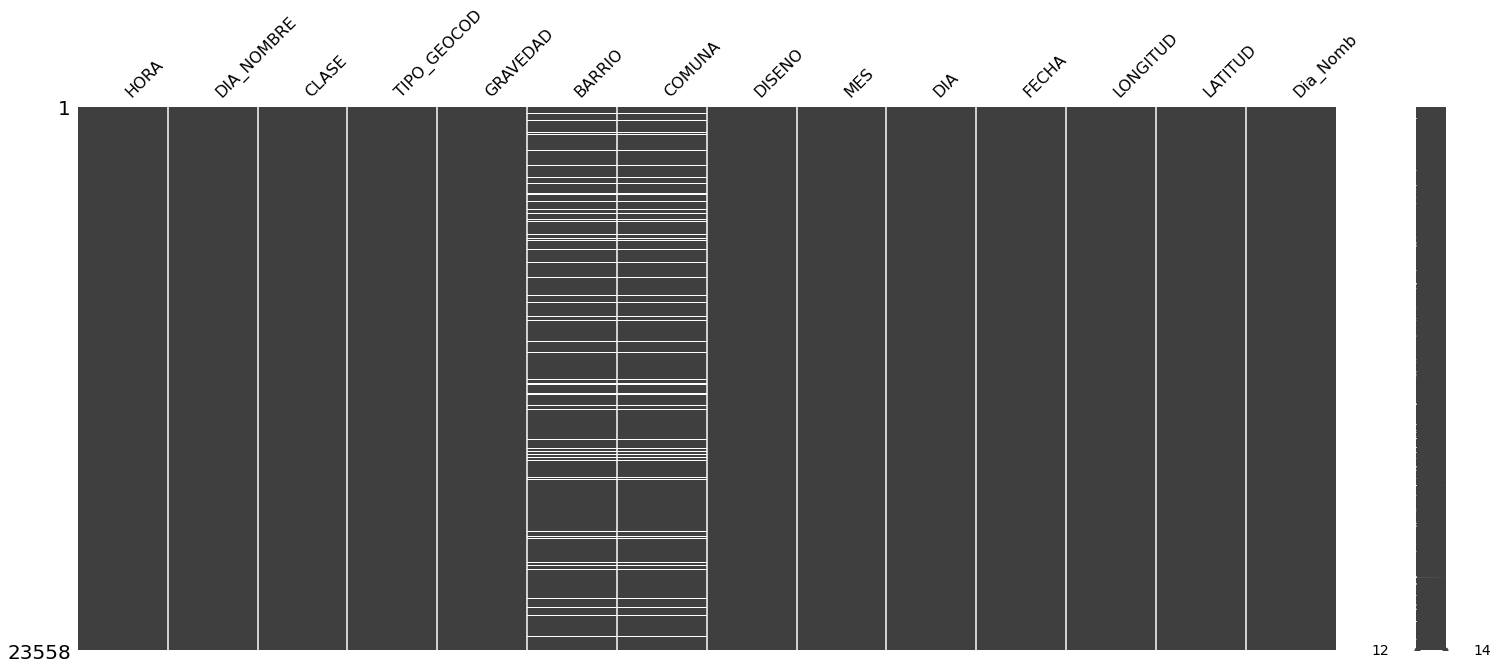

In [ ]:
import missingno as msno #visualización donde hay valores nulos 
msno.matrix(df);

* **Para un analisis exploratorio  los faltantes los manejaremos con fillna sin embargo en los modelos de machine learnig usaremos los modelos respectivos**

In [ ]:
#para el manejo de faltantes lo llenaremos con el más frecuente 
df2=df.copy()
most_common_b=df2['BARRIO'].mode()[0]
most_common_c=df2['COMUNA'].mode()[0]
df2.fillna(most_common_b,inplace=True)
df2.fillna(most_common_c, inplace=True)
df2

,HORA,DIA_NOMBRE,CLASE,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,MES,DIA,FECHA,LONGITUD,LATITUD,Dia_Nomb
0,08:05:00,MIÉRCOLES,Choque,Malla vial,HERIDO,Bolivariana,Laureles Estadio,Interseccion,3,16,2022-03-16,-75.592351,6.243512,Wednesday
1,17:30:00,MIÉRCOLES,Choque,Malla vial,MUERTO,Tenche,Guayabal,Interseccion,3,16,2022-03-16,-75.579832,6.230514,Wednesday
2,17:00:00,MIÉRCOLES,Choque,Malla vial,SOLO DAÑOS,El Pesebre,San Javier,Interseccion,5,4,2022-05-04,-75.599001,6.269136,Wednesday
3,13:30:00,DOMINGO,Choque,Malla vial aproximada: CR 48-31,HERIDO,Perpetuo Socorro,La Candelaria,Tramo de via,6,12,2022-06-12,-75.573979,6.232882,Sunday
4,06:45:00,MIÉRCOLES,Otro,No Ubicada,HERIDO,,,Lote o Predio,5,18,2022-05-18,-75.703816,6.221806,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23572,10:30:00,VIERNES,Otro,Malla vial cruce invertido,HERIDO,Aures No. 2,Robledo,Lote o Predio,4,1,2022-04-01,-75.594370,6.292832,Friday
23573,16:55:00,SÁBADO,Atropello,Malla vial,HERIDO,La Candelaria,La Candelaria,Lote o Predio,7,16,2022-07-16,-75.567197,6.252697,Saturday
23574,13:40:00,MIÉRCOLES,Otro,Malla vial,HERIDO,Santa Fé,Guayabal,Lote o Predio,5,11,2022-05-11,-75.577779,6.227722,Wednesday
23575,03:00:00,MIÉRCOLES,Choque,Malla vial,SOLO DAÑOS,Las Esmeraldas,Aranjuez,Tramo de via,1,5,2022-01-05,-75.554390,6.277247,Wednesday


In [ ]:
#Revisión de los valores faltantes en la copia de la data 
df2.isna().sum()

HORA           0
DIA_NOMBRE     0
CLASE          0
TIPO_GEOCOD    0
GRAVEDAD       0
BARRIO         0
COMUNA         0
DISENO         0
MES            0
DIA            0
FECHA          0
LONGITUD       0
LATITUD        0
Dia_Nomb       0
dtype: int64

In [ ]:
#descripción de variables categoricas
df2.describe(include='O')

,HORA,DIA_NOMBRE,CLASE,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,Dia_Nomb
count,23558,23558,23558,23558,23558,23558,23558,23558,23558
unique,1086,7,6,825,3,317,32,12,7
top,16:00:00,VIERNES,Choque,Malla vial,HERIDO,,La Candelaria,Tramo de via,Friday
freq,391,3632,15432,18204,13660,2943,3978,12300,3632


In [ ]:
#Sin el relleno de los datos 
df.describe(include='O')

,HORA,DIA_NOMBRE,CLASE,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,Dia_Nomb
count,23558,23558,23558,23558,23558,21780,21780,23558,23558
unique,1086,7,6,825,3,317,32,12,7
top,16:00:00,VIERNES,Choque,Malla vial,HERIDO,,La Candelaria,Tramo de via,Friday
freq,391,3632,15432,18204,13660,1165,3978,12300,3632


* Vemos que las las 4 pm ocurren más accidentes, la mayoria son de tipo Herido y por choque 

✈  Veamos algunas variables categóricas para determinar si hay inconsistencia de los datos

In [ ]:
df['CLASE'].value_counts()

Choque            15432
Otro               5159
Atropello          2072
Caida Ocupante      703
Volcamiento         188
Incendio              4
Name: CLASE, dtype: int64

In [ ]:
df['TIPO_GEOCOD'].value_counts()

Malla vial                          18204
No Ubicada                           2274
Malla vial cruce invertido            507
EPM sin Interior                      413
EPM con Interior                      232
                                    ...  
Malla vial aproximada: CL 65-108        1
Malla vial aproximada: CR 47-112        1
Malla vial aproximada: CR 89-31         1
Malla vial aproximada: CR 33-35         1
Malla vial aproximada: CL 67-53         1
Name: TIPO_GEOCOD, Length: 825, dtype: int64

In [ ]:
df['DISENO'].value_counts()

Tramo de via     12300
Lote o Predio     5636
Interseccion      4620
Glorieta           474
Paso Elevado       151
Ciclo Ruta         105
Puente             105
Paso Inferior      100
Tunel               46
Paso a Nivel        12
Pontón               5
Via peatonal         4
Name: DISENO, dtype: int64

In [ ]:
df['GRAVEDAD'].value_counts()

HERIDO        13660
SOLO DAÑOS     9769
MUERTO          129
Name: GRAVEDAD, dtype: int64

# Visualización inicial 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

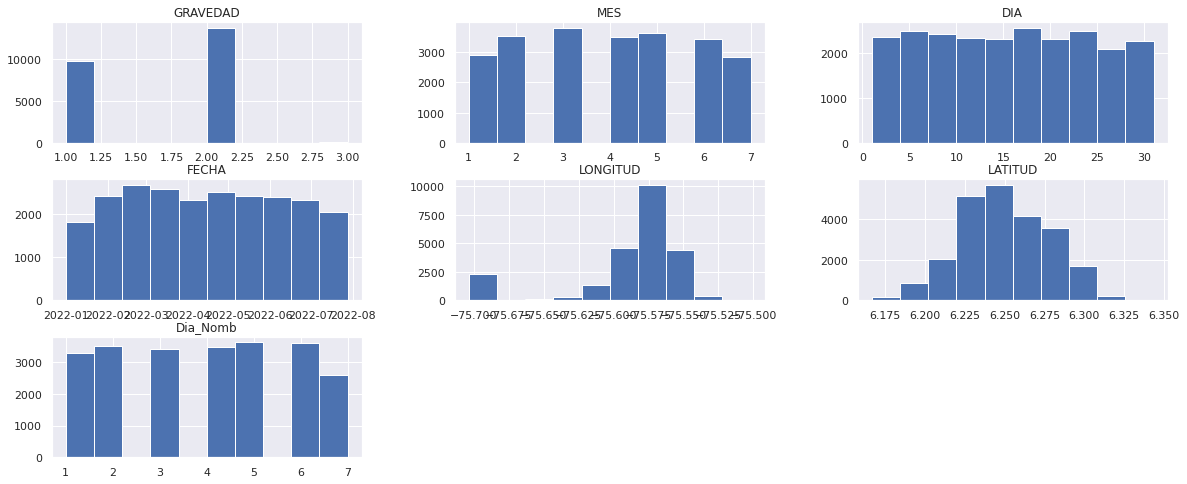

In [ ]:
df.hist()
plt.show()

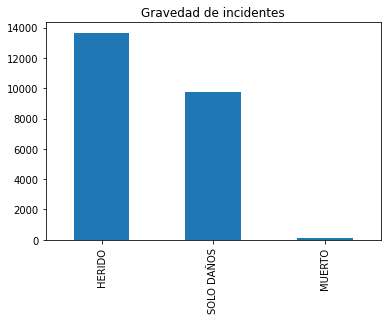

In [ ]:
#Grafico de barras de la gravedad de los incidentes 
df['GRAVEDAD'].value_counts().plot(kind='bar', title='Gravedad de incidentes')

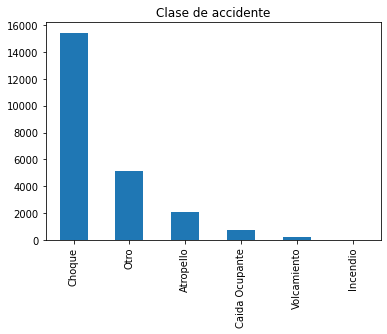

In [ ]:
#Grafico de barras de la gravedad de los incidentes 
df['CLASE'].value_counts().plot(kind='bar', title='Clase de accidente')

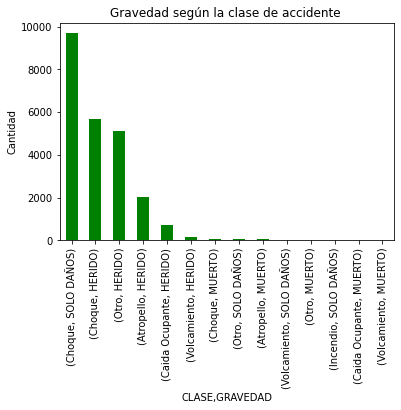

In [ ]:
df[['CLASE','GRAVEDAD']].value_counts().plot(kind='bar', color='g')
plt.title('Gravedad según la clase de accidente ')
plt.ylabel('Cantidad')
plt.show()

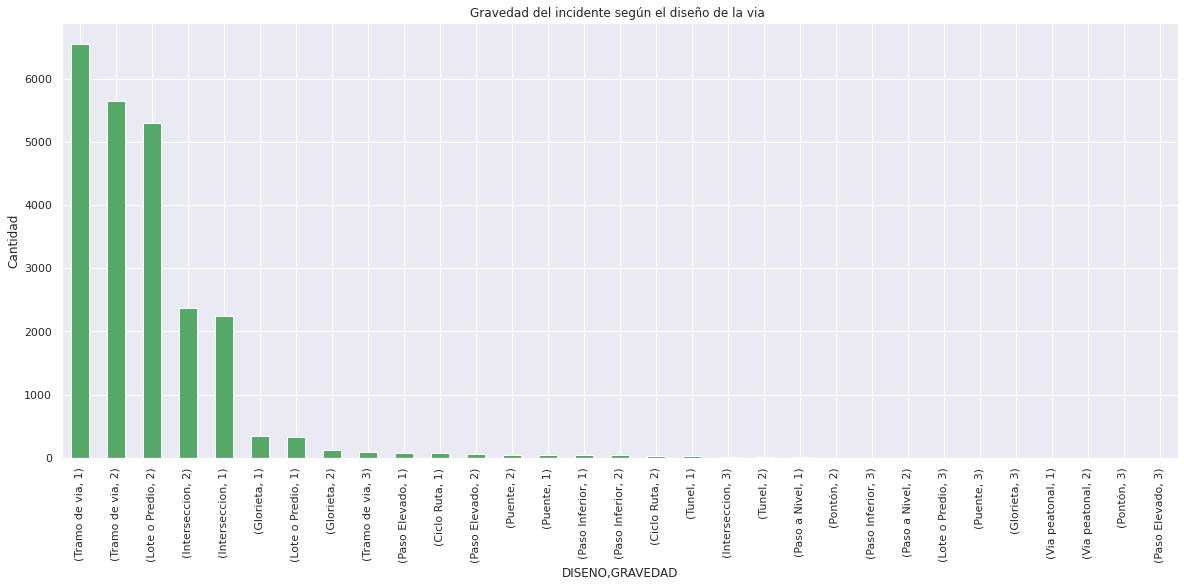

In [ ]:
df[['DISENO','GRAVEDAD']].value_counts().plot(kind='bar', color='g')
plt.title('Gravedad del incidente según el diseño de la via ')
plt.ylabel('Cantidad')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

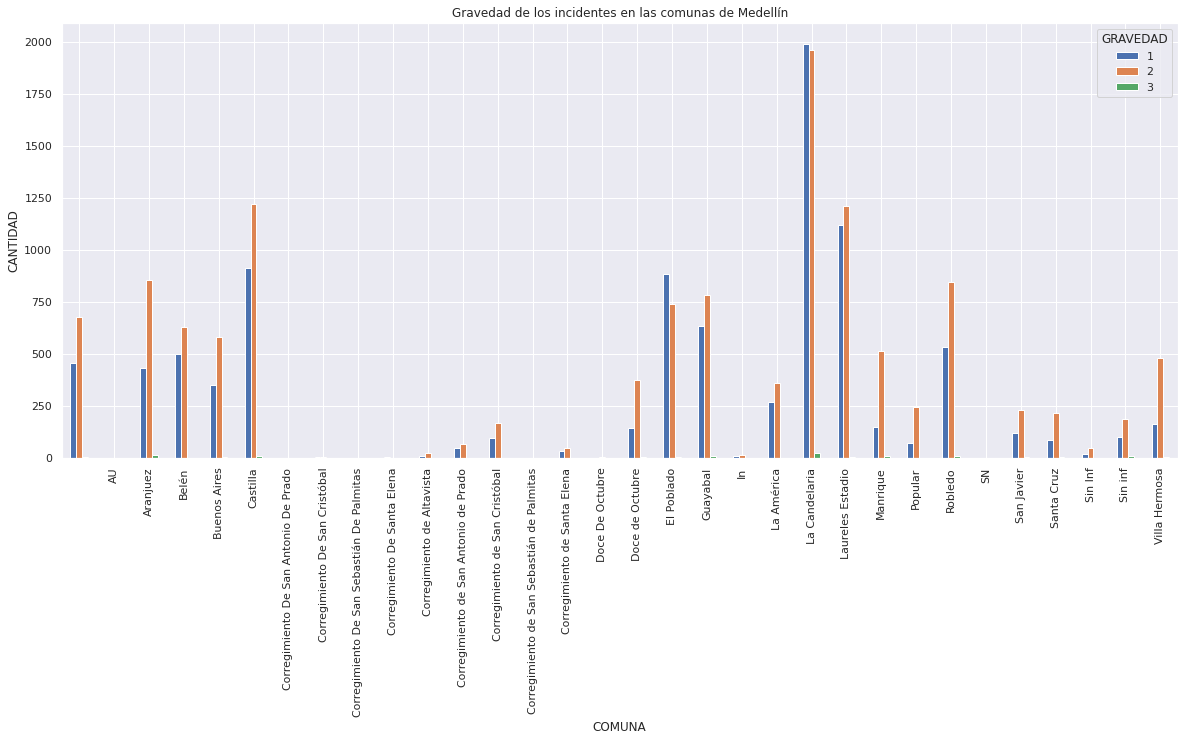

In [ ]:
df.groupby(['COMUNA','GRAVEDAD']).GRAVEDAD.count().unstack().plot(kind='bar')
plt.title('Gravedad de los incidentes en las comunas de Medellín')
plt.ylabel('CANTIDAD')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

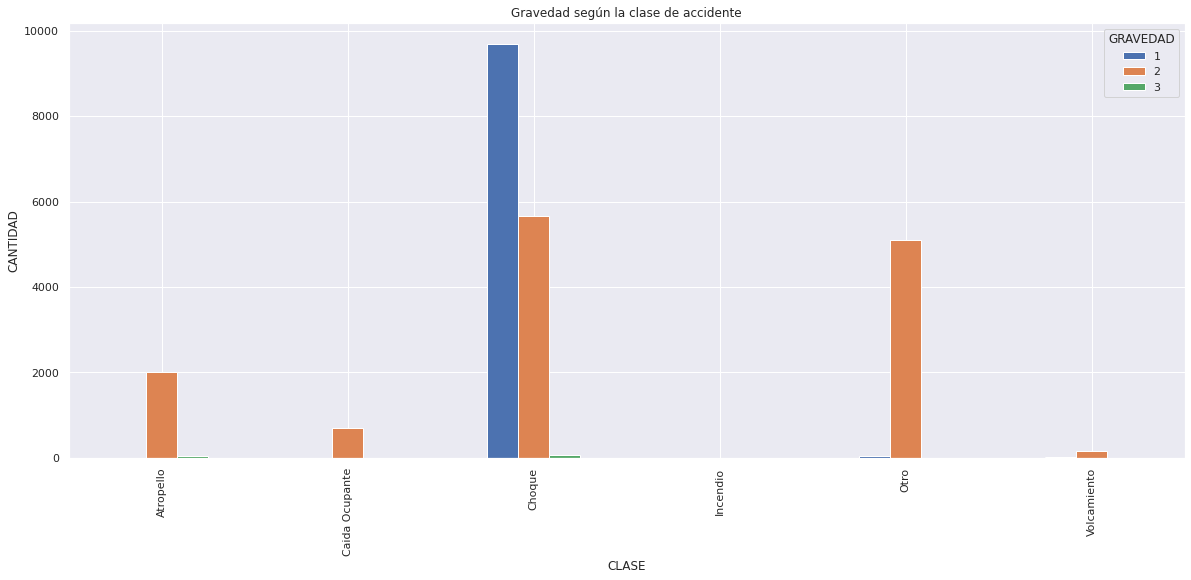

In [ ]:
df.groupby(['CLASE','GRAVEDAD']).GRAVEDAD.count().unstack().plot(kind='bar')
plt.title('Gravedad según la clase de accidente')
plt.ylabel('CANTIDAD')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

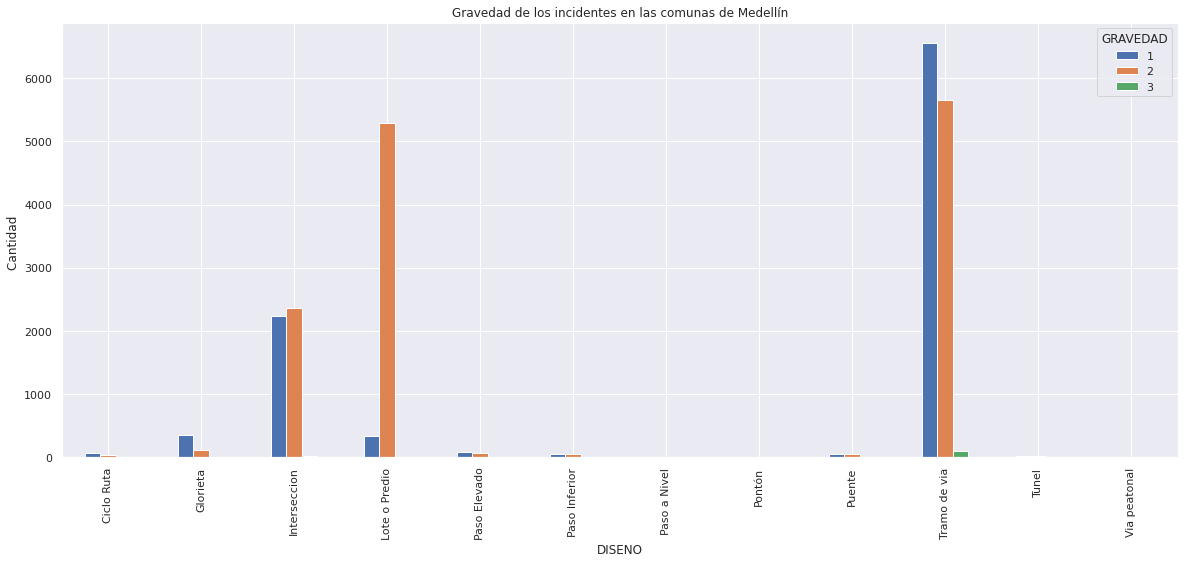

In [ ]:
df.groupby(['DISENO','GRAVEDAD']).GRAVEDAD.count().unstack().plot(kind='bar')
plt.title('Gravedad de los incidentes en las comunas de Medellín')
plt.ylabel('Cantidad ')
plt.show

# Pre-procesamiento para el modelo

In [ ]:
#eliminaremos la columna DIA_NOMBRE
df=df.drop(columns=['DIA_NOMBRE'])

In [ ]:
df['Dia_Nomb'].value_counts()

Friday       3632
Saturday     3594
Tuesday      3505
Thursday     3491
Wednesday    3427
Monday       3306
Sunday       2603
Name: Dia_Nomb, dtype: int64

In [ ]:
df['GRAVEDAD']=df['GRAVEDAD'].replace({'SOLO DAÑOS':1,'HERIDO':2,'MUERTO':3}) #Valores categoricos ordinaes 
df['Dia_Nomb']=df['Dia_Nomb'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
df.head()

,HORA,CLASE,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,MES,DIA,FECHA,LONGITUD,LATITUD,Dia_Nomb
0,08:05:00,Choque,Malla vial,2,Bolivariana,Laureles Estadio,Interseccion,3,16,2022-03-16,-75.592351,6.243512,3
1,17:30:00,Choque,Malla vial,3,Tenche,Guayabal,Interseccion,3,16,2022-03-16,-75.579832,6.230514,3
2,17:00:00,Choque,Malla vial,1,El Pesebre,San Javier,Interseccion,5,4,2022-05-04,-75.599001,6.269136,3
3,13:30:00,Choque,Malla vial aproximada: CR 48-31,2,Perpetuo Socorro,La Candelaria,Tramo de via,6,12,2022-06-12,-75.573979,6.232882,7
4,06:45:00,Otro,No Ubicada,2,NaN,NaN,Lote o Predio,5,18,2022-05-18,-75.703816,6.221806,3


✅ data para usar en el modelo

In [ ]:
df_2=df.copy()
df_2.head()

,HORA,CLASE,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,MES,DIA,FECHA,LONGITUD,LATITUD,Dia_Nomb
0,08:05:00,Choque,Malla vial,2,Bolivariana,Laureles Estadio,Interseccion,3,16,2022-03-16,-75.592351,6.243512,3
1,17:30:00,Choque,Malla vial,3,Tenche,Guayabal,Interseccion,3,16,2022-03-16,-75.579832,6.230514,3
2,17:00:00,Choque,Malla vial,1,El Pesebre,San Javier,Interseccion,5,4,2022-05-04,-75.599001,6.269136,3
3,13:30:00,Choque,Malla vial aproximada: CR 48-31,2,Perpetuo Socorro,La Candelaria,Tramo de via,6,12,2022-06-12,-75.573979,6.232882,7
4,06:45:00,Otro,No Ubicada,2,NaN,NaN,Lote o Predio,5,18,2022-05-18,-75.703816,6.221806,3


In [ ]:
df_2['COMUNA'].value_counts()

La Candelaria                                 3978
Laureles Estadio                              2337
Castilla                                      2145
El Poblado                                    1630
Guayabal                                      1427
Robledo                                       1392
Aranjuez                                      1301
                                              1141
Belén                                         1133
Buenos Aires                                   935
Manrique                                       673
Villa Hermosa                                  647
La América                                     633
Doce de Octubre                                520
San Javier                                     355
Popular                                        316
Santa Cruz                                     305
Sin inf                                        297
Corregimiento de San Cristóbal                 265
Corregimiento de San Antonio de

In [ ]:
#remplazos en la columna de COMUNA
df_2['COMUNA']=df_2['COMUNA'].replace('Corregimiento De San Sebastián De Palmitas','Corregimiento de San Sebastián de Palmitas')
df_2['COMUNA']=df_2['COMUNA'].replace('Sin Inf','Sin inf')
df_2['COMUNA']=df_2['COMUNA'].replace('AU','Sin inf')
df_2['COMUNA']=df_2['COMUNA'].replace('In','Sin inf')
df_2['COMUNA']=df_2['COMUNA'].replace('SN','Sin inf')
df_2['COMUNA']=df_2['COMUNA'].replace('Corregimiento De Santa Elena','Corregimiento de Santa Elena')
df_2['COMUNA']=df_2['COMUNA'].replace('Corregimiento De San Antonio De Prado','Corregimiento de San Antonio de Prado')
df_2['COMUNA']=df_2['COMUNA'].replace('Corregimiento De San Cristóbal','Corregimiento de San Cristóbal')
df_2['COMUNA']=df_2['COMUNA'].replace('Doce De Octubre','Doce de Octubre')

In [ ]:
df_2['COMUNA'].value_counts()

La Candelaria                                 3978
Laureles Estadio                              2337
Castilla                                      2145
El Poblado                                    1630
Guayabal                                      1427
Robledo                                       1392
Aranjuez                                      1301
                                              1141
Belén                                         1133
Buenos Aires                                   935
Manrique                                       673
Villa Hermosa                                  647
La América                                     633
Doce de Octubre                                524
Sin inf                                        389
San Javier                                     355
Popular                                        316
Santa Cruz                                     305
Corregimiento de San Cristóbal                 275
Corregimiento de San Antonio de

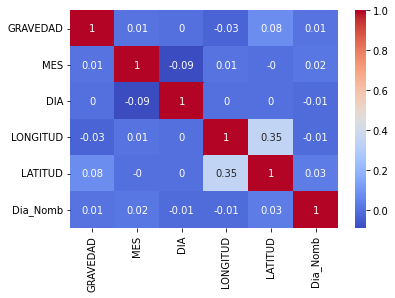

In [ ]:
corr=df_2.corr().round(2)
sn.heatmap(corr,annot=True, cmap='coolwarm')
plt.show() ##En este caso el mapa de correlación no nos sirve

In [ ]:
#variables categoricas nominales --> (One-hot encoding)
clase_dummy=pd.get_dummies(df_2['CLASE'], prefix='CLASE')
comuna_dummy=pd.get_dummies(df_2['COMUNA'],prefix='COMUNA')
diseno_dummy=pd.get_dummies(df_2['DISENO'],prefix='DISENO')

In [ ]:
#unir las variables 
df_2=pd.concat([df_2,clase_dummy],axis=1)
df_2=pd.concat([df_2,comuna_dummy],axis=1)
df_2=pd.concat([df_2,diseno_dummy],axis=1)

In [ ]:
df_2.head()

,HORA,CLASE,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,MES,DIA,FECHA,...,DISENO_Interseccion,DISENO_Lote o Predio,DISENO_Paso Elevado,DISENO_Paso Inferior,DISENO_Paso a Nivel,DISENO_Pontón,DISENO_Puente,DISENO_Tramo de via,DISENO_Tunel,DISENO_Via peatonal
0,08:05:00,Choque,Malla vial,2,Bolivariana,Laureles Estadio,Interseccion,3,16,2022-03-16,...,1,0,0,0,0,0,0,0,0,0
1,17:30:00,Choque,Malla vial,3,Tenche,Guayabal,Interseccion,3,16,2022-03-16,...,1,0,0,0,0,0,0,0,0,0
2,17:00:00,Choque,Malla vial,1,El Pesebre,San Javier,Interseccion,5,4,2022-05-04,...,1,0,0,0,0,0,0,0,0,0
3,13:30:00,Choque,Malla vial aproximada: CR 48-31,2,Perpetuo Socorro,La Candelaria,Tramo de via,6,12,2022-06-12,...,0,0,0,0,0,0,0,1,0,0
4,06:45:00,Otro,No Ubicada,2,NaN,NaN,Lote o Predio,5,18,2022-05-18,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23558 entries, 0 to 23576
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   HORA                                               23558 non-null  object        
 1   CLASE                                              23558 non-null  object        
 2   TIPO_GEOCOD                                        23558 non-null  object        
 3   GRAVEDAD                                           23558 non-null  int64         
 4   BARRIO                                             21780 non-null  object        
 5   COMUNA                                             21780 non-null  object        
 6   DISENO                                             23558 non-null  object        
 7   MES                                                23558 non-null  int64         
 8   DIA             

In [ ]:
datos=df_2.drop(['HORA','FECHA','CLASE','TIPO_GEOCOD','BARRIO','COMUNA','DISENO'],axis=1)
datos.head()

,GRAVEDAD,MES,DIA,LONGITUD,LATITUD,Dia_Nomb,CLASE_Atropello,CLASE_Caida Ocupante,CLASE_Choque,CLASE_Incendio,...,DISENO_Interseccion,DISENO_Lote o Predio,DISENO_Paso Elevado,DISENO_Paso Inferior,DISENO_Paso a Nivel,DISENO_Pontón,DISENO_Puente,DISENO_Tramo de via,DISENO_Tunel,DISENO_Via peatonal
0,2,3,16,-75.592351,6.243512,3,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,3,3,16,-75.579832,6.230514,3,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,5,4,-75.599001,6.269136,3,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,2,6,12,-75.573979,6.232882,7,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2,5,18,-75.703816,6.221806,3,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23558 entries, 0 to 23576
Data columns (total 47 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   GRAVEDAD                                           23558 non-null  int64  
 1   MES                                                23558 non-null  int64  
 2   DIA                                                23558 non-null  int64  
 3   LONGITUD                                           23558 non-null  float64
 4   LATITUD                                            23558 non-null  float64
 5   Dia_Nomb                                           23558 non-null  int64  
 6   CLASE_Atropello                                    23558 non-null  uint8  
 7   CLASE_Caida Ocupante                               23558 non-null  uint8  
 8   CLASE_Choque                                       23558 non-null  uint8  
 9   CLASE_

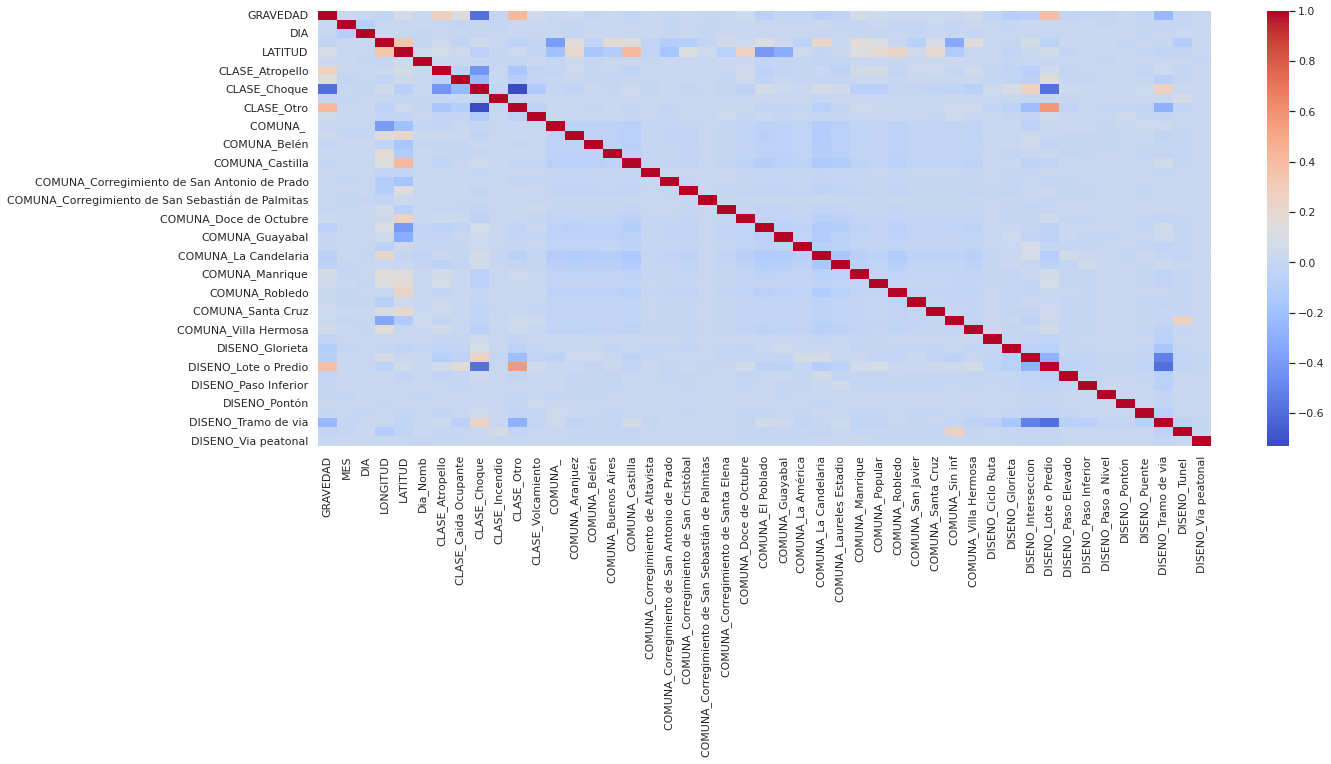

In [ ]:
corr=datos.corr().round(2)
sn.set(rc = {'figure.figsize':(20,8)})
sn.heatmap(corr, cmap='coolwarm')
plt.show() ##En este caso el mapa de correlación no nos sirve

# Modelos de Machine Learning

In [ ]:
#Librerias 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#matriz de características y vector objetivo
X=datos.drop(columns='GRAVEDAD')
y=datos['GRAVEDAD']
print(X.shape)
print(y.shape)

(23558, 46)
(23558,)


In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
#estandarización
scaler = StandardScaler()

▶ K-Vecinos Más Cercanos (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# scaler y el modelo en un pipeline y ajustar el pipeline en los datos de entrenamiento.
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
#prediccion del conjunto de pruebas 
predictions = knn_pipe.predict(X_test)
predictions

array([1, 1, 2, ..., 2, 1, 2])

In [ ]:
#rendimiento 
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.7275042444821732

Encontramos que el modelo puede predecir en un 69%  de la veces 

In [ ]:
#resumen de precisón 
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_pipe.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_pipe.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.73


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [ ]:
#MAtriz de confusión 
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[1615  811    8]
 [ 918 2477   21]
 [  16   24    0]]
              precision    recall  f1-score   support

           1       0.63      0.66      0.65      2434
           2       0.75      0.73      0.74      3416
           3       0.00      0.00      0.00        40

    accuracy                           0.69      5890
   macro avg       0.46      0.46      0.46      5890
weighted avg       0.70      0.69      0.69      5890



▶ XGBoost 

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
#Clasificador 
model= XGBClassifier()
#Fitting mode
model.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

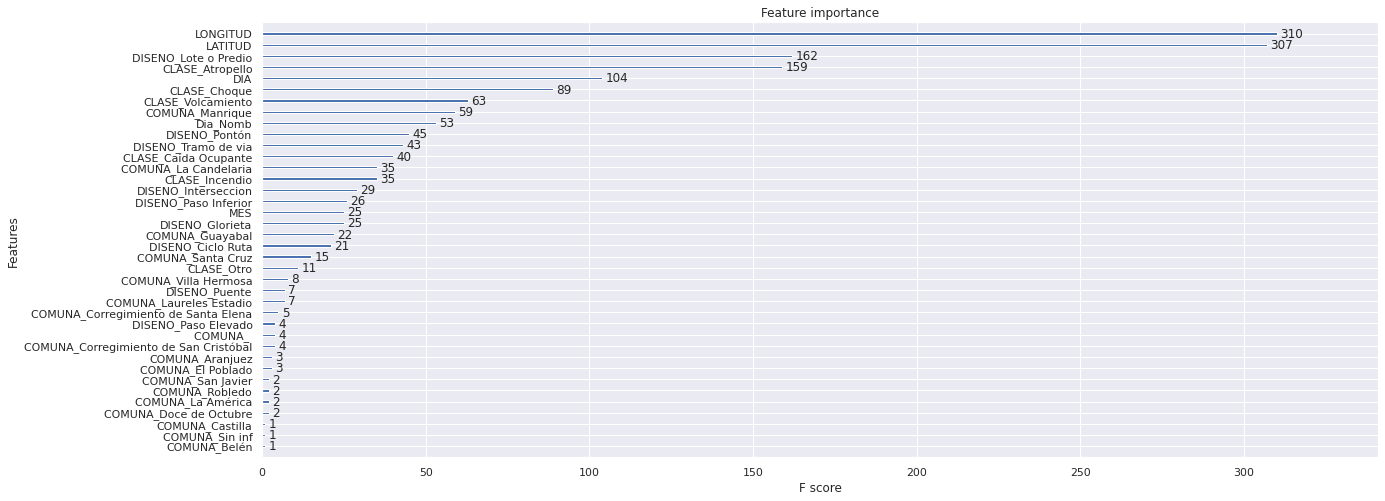

In [ ]:
#variables más importantes 
xgb.plot_importance(model, ax=plt.gca())

vemos las variables en orden de su importancia 

In [ ]:
#Accuracy 

model.score(X_train,y_train)

0.7746207833371066

In [ ]:
pred_train=model.predict(X_train)

In [ ]:
confusion_matrix(y_train,pred_train)

array([[6888,  447,    0],
       [3446, 6798,    0],
       [  42,   47,    0]])

In [ ]:
predi=model.predict(X_test)

In [ ]:
predi

array([1, 1, 2, ..., 1, 1, 2])

In [ ]:
model.score(X_test,y_test)

0.7563667232597623

In [ ]:
print(classification_report(y_test,predi))

              precision    recall  f1-score   support

           1       0.64      0.94      0.76      2434
           2       0.93      0.63      0.75      3416
           3       0.00      0.00      0.00        40

    accuracy                           0.76      5890
   macro avg       0.52      0.53      0.51      5890
weighted avg       0.81      0.76      0.75      5890



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hay un sobre ajuste